<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu7/Minggu7_2241720045_TirtaNBP_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 7: Clustering
# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# NO: 27

# Tugas Praktikum
## Tugas
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kode tersebut digunakan untuk **menghubungkan Google Drive** ke Google Colab. File di Google Drive akan dapat diakses di direktori `/content/drive`.

In [14]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

# Memuat data
df = pd.read_csv('/content/drive/MyDrive/dataset/Minggu7/Mall_Customers.csv')

# Menampilkan 5 baris pertama
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. **Mengimpor pustaka**:
   - `pandas`, `numpy`, `matplotlib.pyplot`, `KMeans` dari `sklearn.cluster`, dan `seaborn` digunakan untuk analisis data, perhitungan numerik, visualisasi, serta algoritma clustering.

2. **Memuat data**:
   - `df = pd.read_csv(...)` membaca dataset `Mall_Customers.csv` dari Google Drive ke dalam DataFrame `df`.

3. **Menampilkan 5 baris pertama**:
   - `df.head()` menampilkan lima baris pertama dari dataset untuk melihat sekilas data yang dimuat.
   

Output tersebut menunjukkan lima baris pertama dari dataset `Mall_Customers.csv` dengan kolom `CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, dan `Spending Score (1-100)`. Setiap kolom mewakili identitas, jenis kelamin, usia, pendapatan tahunan, dan skor belanja pelanggan. Output ini membantu memahami struktur awal data.

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)


In [4]:
# Pilih hanya dua fitur: Annual Income dan Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Hasil seleksi fitur
print("Hasil Seleksi Fitur:")
print(X.head())

Hasil Seleksi Fitur:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


Output tersebut menampilkan lima baris pertama hasil seleksi fitur dari dataset, yaitu hanya menyisakan kolom **`Annual Income (k$)`** dan **`Spending Score (1-100)`**. Hasil ini menunjukkan pendapatan tahunan dan skor belanja dari setiap pelanggan, yang nantinya akan digunakan sebagai variabel untuk analisis clustering.

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.


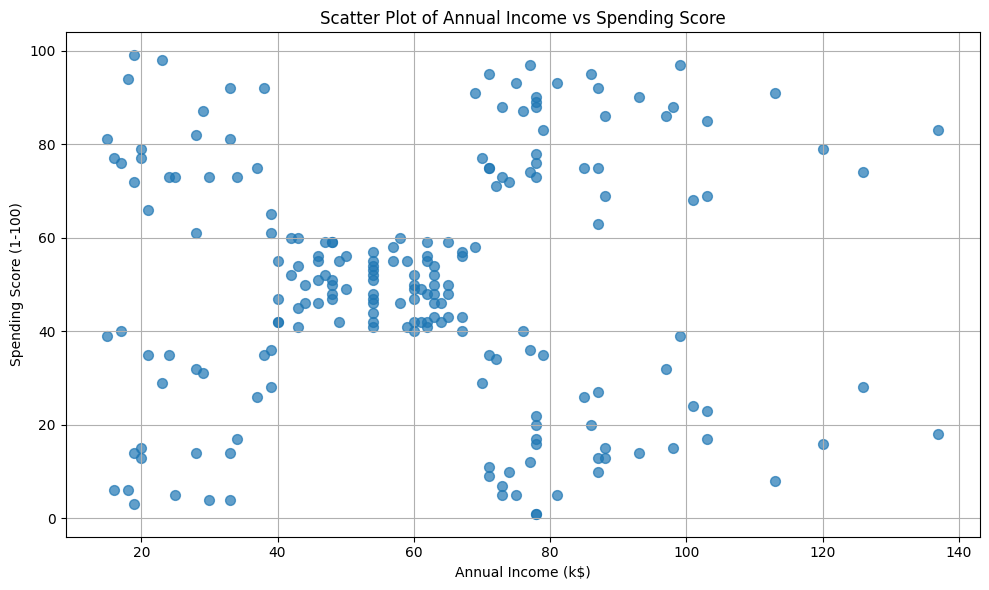

In [5]:
# Plot tanpa variasi warna untuk Age atau Gender
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50, alpha=0.7)

# Menambahkan judul dan label
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari plot ini, terlihat bahwa pelanggan tersebar di seluruh rentang pendapatan (15 hingga 135 ribu dolar) dan skor belanja (0 hingga 100), dengan beberapa kelompok titik yang lebih padat di area tertentu, mengindikasikan adanya pola atau konsentrasi pelanggan dengan karakteristik yang sama. Variasi skor belanja untuk pendapatan tertentu juga terlihat, di mana pelanggan dengan pendapatan yang sama bisa memiliki skor belanja yang sangat berbeda, menunjukkan bahwa pendapatan tidak selalu menentukan kebiasaan belanja. Selain itu, adanya pengelompokan titik di beberapa area mengindikasikan potensi terbentuknya beberapa klaster berdasarkan pola belanja dan pendapatan, yang sangat berguna dalam analisis klastering menggunakan algoritma K-Means.

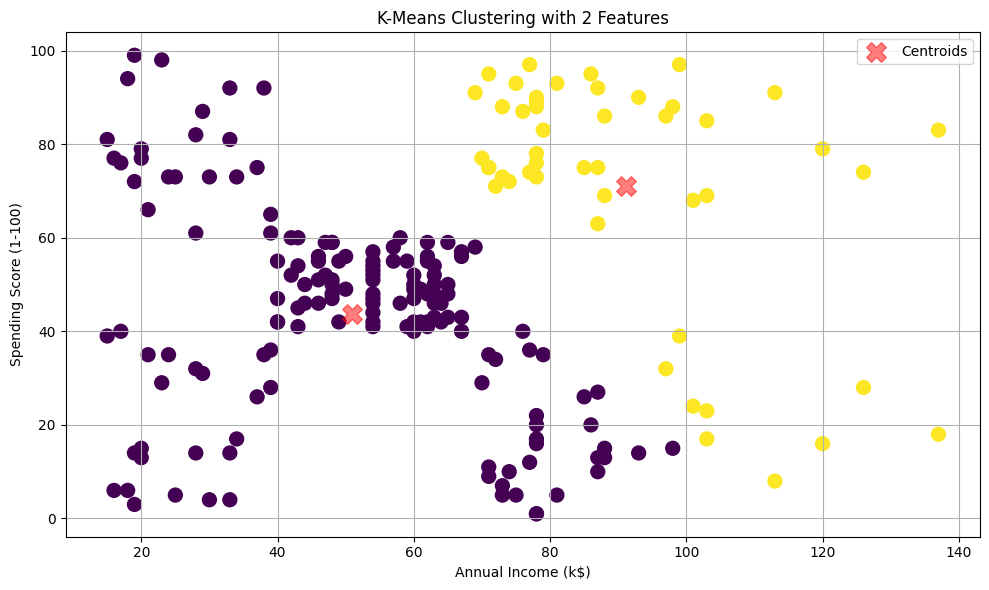

In [6]:
# Inisiasi obyek KMeans dengan n_clusters=2
cl_kmeans = KMeans(n_clusters=2, random_state=42)

# Fit dan prediksi model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasil cluster
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=100, c=y_kmeans, cmap='viridis')

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids')

# Menambahkan judul dan label
plt.title('K-Means Clustering with 2 Features')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.tight_layout()

# Menampilkan plot
plt.show()

Dalam gambar tersebut, pelanggan dikelompokkan menjadi dua klaster yang ditunjukkan dengan warna yang berbeda. Setiap titik mewakili pelanggan berdasarkan pendapatan tahunan dan skor belanja mereka, sementara centroid, yang ditandai dengan simbol X merah, menunjukkan titik tengah dari masing-masing klaster. Kode program yang digunakan menginisiasi objek KMeans dengan dua klaster (`n_clusters=2`), kemudian memfit dan memprediksi model menggunakan data yang telah dipilih. Dengan cara ini, kita dapat melihat bagaimana pelanggan dikelompokkan berdasarkan pola belanja dan pendapatan, yang memberikan wawasan tentang segmentasi pasar. Plot ini membantu untuk memahami karakteristik dari setiap klaster dan bagaimana mereka terdistribusi dalam ruang fitur.

In [7]:
# Cek nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 183653.3289473683


Nilai SSE yang lebih rendah menunjukkan bahwa titik-titik dalam klaster lebih dekat ke centroid mereka, yang berarti model lebih baik dalam mengelompokkan data. Dalam hal ini, nilai SSE sebesar **183653.33** menunjukkan seberapa baik model K-Means mengelompokkan pelanggan berdasarkan `Annual Income` dan `Spending Score`. Metrik ini dapat digunakan untuk membandingkan performa model K-Means dengan jumlah klaster yang berbeda, di mana tujuan utamanya adalah untuk meminimalkan nilai SSE.

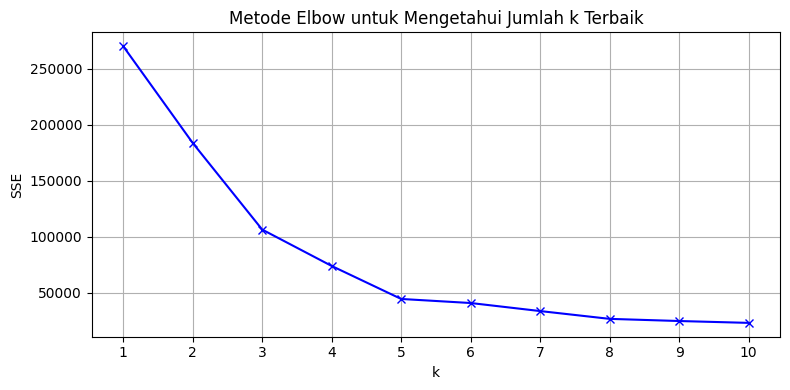

In [8]:
# Implementasi Metode Elbow
def elbow_method(data, max_k):
    # List nilai SSE
    sse = []

    # Cari k terbaik dari 1 hingga max_k
    K = range(1, max_k + 1)

    # Cek nilai SSE setiap k
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(data)
        sse.append(kmeanModel.inertia_)

    # Plotting the distortions
    plt.figure(figsize=(8, 4))
    plt.plot(K, sse, "bx-")
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
    plt.xticks(K)  # Menampilkan semua nilai k pada sumbu X
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Return nilai SSE untuk digunakan di Kode Program 5
    return sse

# Menjalankan fungsi metode elbow dan menyimpan hasil SSE
sse = elbow_method(X, max_k=10)

Dari grafik, terlihat bahwa nilai SSE berkurang drastis saat k meningkat dari 1 hingga sekitar 5, di mana penurunan SSE mulai melambat setelah titik tersebut. Kesimpulan yang dapat diambil adalah bahwa jumlah klaster yang optimal untuk model K-Means ini adalah sekitar 5. Ini karena pada titik ini, penambahan klaster lebih lanjut tidak memberikan pengurangan signifikan dalam nilai SSE, yang menunjukkan bahwa model tidak menjadi lebih baik dalam mengelompokkan data. Kode program yang digunakan untuk melakukan perhitungan SSE secara iteratif untuk setiap nilai k ini efektif dalam membantu menentukan jumlah klaster yang paling sesuai untuk analisis selanjutnya.

In [9]:
# Menampilkan Nilai SSE setiap k
def print_sse(sse):
    for idx, sse_val in enumerate(sse, start=1):
        print(f'k={idx}; SSE={sse_val}')

# Memanggil fungsi untuk menampilkan SSE setiap k
print_sse(sse)

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436
k=10; SSE=23103.122085983905


Dari hasil tersebut, terlihat bahwa nilai SSE berkurang secara signifikan dengan meningkatnya jumlah klaster. Penurunan yang paling tajam terjadi antara k=1 dan k=5, di mana nilai SSE turun dari 269981.28 menjadi 44448.46. Setelah k=5, meskipun nilai SSE terus menurun, penurunannya mulai melambat. Ini mengindikasikan bahwa menambah lebih banyak klaster setelah k=5 tidak memberikan peningkatan yang signifikan dalam kinerja model.

In [11]:
# Memilih dua fitur: Annual Income dan Spending Score
df_train = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Inisiasi obyek KMeans dengan n_clusters=5 dan n_init=10
cl_kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

# Fit dan prediksi model
y_kmeans = cl_kmeans.fit_predict(df_train)

# Menampilkan hasil prediksi
print("Hasil clustering:")
print(y_kmeans)


Hasil clustering:
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Hasil clustering menggunakan model K-Means menunjukkan bahwa setiap pelanggan telah dikelompokkan ke dalam satu dari lima kluster berdasarkan dua fitur: **Annual Income (k$)** dan **Spending Score (1-100)**. Array output `y_kmeans` memberikan label kluster untuk masing-masing pelanggan, dengan variasi jumlah pelanggan di setiap kluster. Misalnya, beberapa pelanggan termasuk dalam kluster 0, sementara yang lain tersebar di kluster 1, 2, 3, dan 4. Ini menandakan adanya perbedaan dalam karakteristik penghasilan dan pengeluaran di antara pelanggan, yang dapat diinvestigasi lebih lanjut.

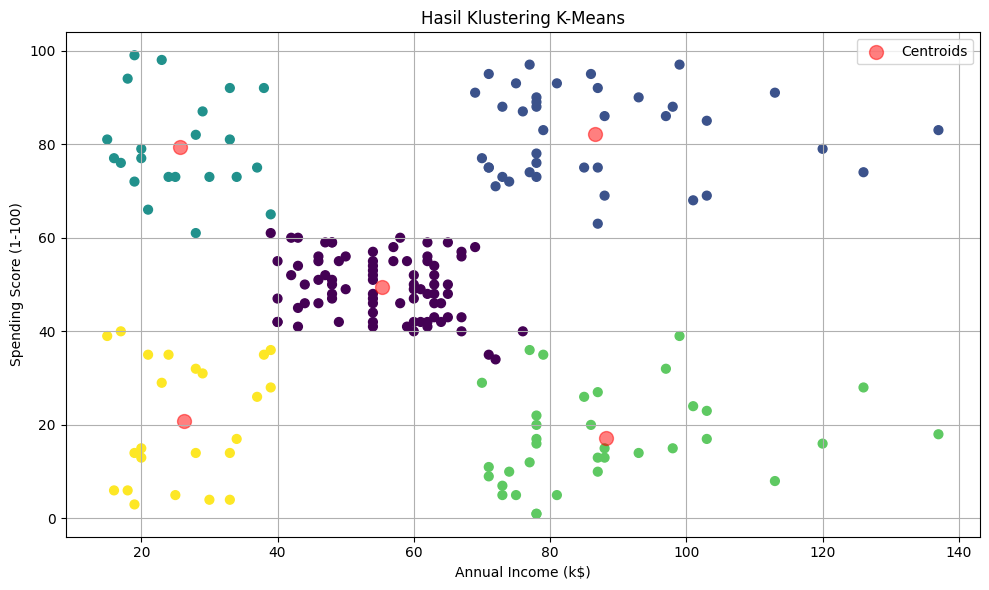

In [13]:
# Plot hasil cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40, c=y_kmeans, cmap='viridis')

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, label='Centroids')

# Menambahkan judul dan label
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()
plt.tight_layout()

# Menampilkan plot
plt.show()


Gambar menunjukkan hasil klastering K-Means yang membagi data pelanggan ke dalam beberapa kelompok berdasarkan pendapatan tahunan ("Annual Income") dan skor pengeluaran mereka ("Spending Score"). Titik-titik berwarna di grafik merepresentasikan pelanggan, dengan warna berbeda untuk setiap klaster.

Centroid atau pusat dari setiap klaster ditandai dengan titik merah yang lebih besar. Posisi centroid adalah hasil perhitungan rata-rata dari semua titik dalam klaster tersebut.

Dari grafik ini, kita dapat melihat bagaimana K-Means mengelompokkan pelanggan yang memiliki pola serupa dalam hal penghasilan dan pengeluaran, sehingga memudahkan analisis kelompok pelanggan yang berbeda.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [24]:
# Install library
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8b110282a61c687e7f02559d7353e01d393008d40583101ecec03f764e238dce
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [25]:
# Import library yang diperlukan
import pandas as pd
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

1. **pandas**: Digunakan untuk membaca, mengolah, dan memanipulasi data dalam bentuk tabel (DataFrame).
2. **minisom**: Digunakan untuk klastering data menggunakan Self-Organizing Maps (SOM), metode pembelajaran tak terawasi.
3. **numpy**: Untuk komputasi numerik dan operasi array yang efisien.
4. **matplotlib.pyplot**: Untuk membuat berbagai visualisasi data, seperti grafik dan plot.

In [26]:
# Load dataset
file_path = '/content/drive/MyDrive/dataset/Minggu7/Mall_Customers.csv'
data = pd.read_csv(file_path)

- **`file_path`**: Menunjukkan lokasi file dataset yang akan digunakan, dalam hal ini file `Mall_Customers.csv` di dalam Google Drive.
- **`pd.read_csv(file_path)`**: Fungsi dari `pandas` untuk membaca file CSV. Hasil pembacaan ini akan disimpan dalam variabel **`data`** sebagai DataFrame, yang memudahkan manipulasi dan analisis lebih lanjut.

In [27]:
# Ekstrak fitur yang dibutuhkan: Annual Income (k$) dan Spending Score (1-100)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

- **Annual Income (k$)**: Pendapatan tahunan pelanggan dalam ribuan dolar.
- **Spending Score (1-100)**: Skor pengeluaran pelanggan, biasanya mencerminkan seberapa banyak mereka menghabiskan uang di mall.


In [28]:
# Normalisasi data
features = features / features.max(axis=0)

# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], features.shape[1], sigma=0.5, learning_rate=0.5)

# Inisialisasi bobot secara acak
som.random_weights_init(features)

# Pelatihan SOM
num_epochs = 100
som.train_random(features, num_epochs)

1. **Normalisasi data**:
   - `features = features / features.max(axis=0)`: Membagi setiap nilai dalam fitur dengan nilai maksimum di kolom tersebut. Ini menormalkan data sehingga berada dalam rentang [0, 1], yang membantu algoritma SOM beroperasi dengan lebih efisien.

2. **Inisialisasi SOM**:
   - `map_size = (10, 10)`: Mendefinisikan ukuran peta SOM sebagai grid 10x10.
   - `som = MiniSom(map_size[0], map_size[1], features.shape[1], sigma=0.5, learning_rate=0.5)`: Membuat objek SOM dengan ukuran peta yang sudah ditentukan. Di sini, `features.shape[1]` menunjukkan jumlah fitur yang akan digunakan untuk pelatihan (dalam kasus ini 2: Annual Income dan Spending Score).
     - **Sigma**: Mengontrol ukuran neighborhood yang dipertimbangkan selama pelatihan.
     - **Learning rate**: Mengontrol seberapa cepat SOM belajar dari data.

3. **Inisialisasi bobot secara acak**:
   - `som.random_weights_init(features)`: Inisialisasi bobot peta SOM dengan nilai acak berdasarkan fitur input. Bobot ini akan diperbarui selama pelatihan.

4. **Pelatihan SOM**:
   - `som.train_random(features, num_epochs)`: Melatih SOM menggunakan data yang sudah dinormalisasi. `num_epochs = 100` berarti model dilatih selama 100 iterasi, di mana pada setiap iterasi, SOM akan memperbarui bobot berdasarkan input data acak.

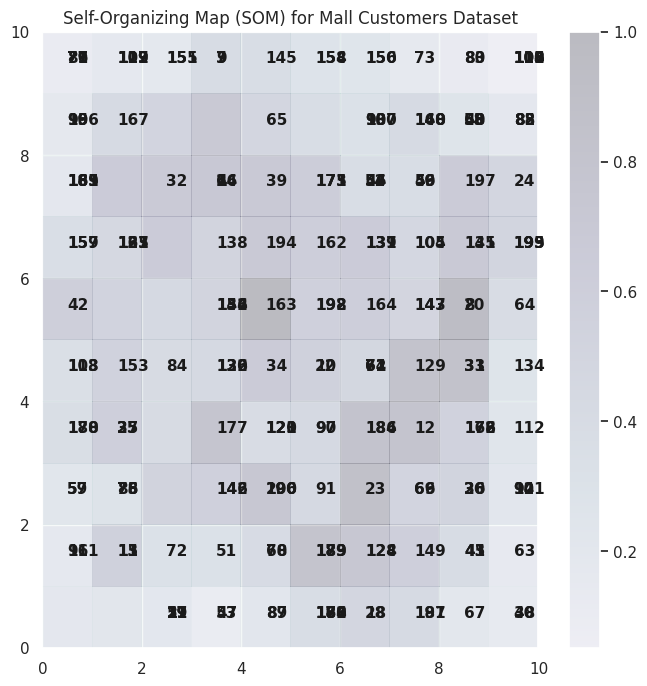

In [29]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(features):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
plt.title('Self-Organizing Map (SOM) for Mall Customers Dataset')
plt.show()

1. **Pemenang SOM (Winner Nodes)**:
   - Setiap nomor di dalam grid 10x10 merepresentasikan indeks data pelanggan yang ditempatkan di node tersebut. Node adalah "pemenang" untuk setiap data, artinya node tersebut paling dekat dengan sampel input dalam ruang fitur.

2. **Peta jarak (Distance Map)**:
   - Latar belakang menggunakan skala warna abu-abu (dari terang ke gelap) menunjukkan jarak antara bobot neuron SOM terdekat. Area yang lebih terang menunjukkan lebih banyak variasi antar neuron (menandakan batas klaster), sedangkan area yang lebih gelap menunjukkan kelompok data yang lebih seragam atau terkluster secara dekat.

3. **Penjelasan Kode**:
   - **`som.winner(x)`**: Menentukan node pemenang untuk setiap sampel `x` (data pelanggan).
   - **`plt.text(...)`**: Menempatkan teks (nomor pelanggan) pada node pemenang yang sesuai dalam peta SOM.
   - **`som.distance_map()`**: Menghasilkan peta jarak antar neuron, yang divisualisasikan sebagai latar belakang menggunakan warna abu-abu.

In [53]:
# Install library
!pip install minisom skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [54]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

1. **NumPy (`np`)**: Digunakan untuk melakukan operasi numerik dan manipulasi array, yang sering diperlukan saat bekerja dengan data citra.

2. **Matplotlib (`plt`)**: Library untuk membuat visualisasi data, termasuk grafik dan plot, yang dapat digunakan untuk menampilkan citra.

3. **`skimage.io`**: Bagian dari library `scikit-image` yang digunakan untuk input dan output citra.

In [55]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

Fungsi `initialize_weights` menginisialisasi bobot SOM dengan nilai acak. Fungsi `calculate_distance` menghitung jarak antara vektor input dan bobot, sedangkan `find_winner_unit_in_image` menemukan unit pemenang dengan jarak terdekat. Fungsi `update_weights` memperbarui bobot berdasarkan input, unit pemenang, laju pembelajaran, dan radius tetangga. Terakhir, fungsi `train_som` melatih SOM dengan memproses citra selama sejumlah epoch, mengubah parameter laju pembelajaran dan radius seiring waktu untuk meningkatkan hasil pelatihan.

In [56]:
# Load citra Merak dari Google Drive
merak_path = '/content/drive/MyDrive/dataset/Minggu7/sunset.jpg'
merak = io.imread(merak_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

Kode ini memuat citra "Merak" dari Google Drive dengan menentukan path file di variabel `merak_path`. Citra dibaca menggunakan `io.imread`, dan nilai intensitas piksel dinormalisasi ke rentang [0, 1] dengan membagi dengan 255.0. Citra yang telah dinormalisasi ini kemudian siap untuk diproses lebih lanjut.

In [57]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(merak, num_epochs, initial_learning_rate, initial_neighborhood_radius)

1. **Parameter Pelatihan**:
   - `num_epochs`: Jumlah iterasi pelatihan yang ditetapkan sebanyak 100.
   - `initial_learning_rate`: Tingkat pembelajaran awal diatur pada 0.1.
   - `initial_neighborhood_radius`: Radius tetangga awal ditetapkan sebesar 5.

2. **Pelatihan SOM**: Fungsi `train_som` dipanggil dengan parameter citra, jumlah epoch, dan parameter awal untuk tingkat pembelajaran dan radius tetangga. Hasil dari pelatihan, yaitu bobot yang terlatih, disimpan dalam variabel `trained_weights`.

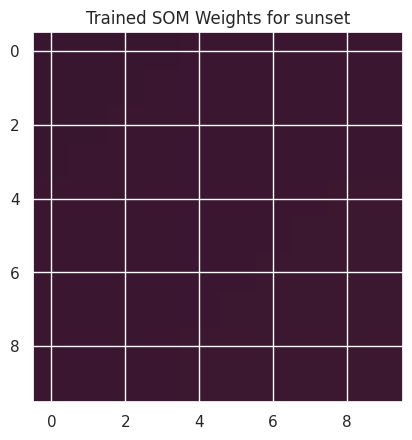

In [59]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for sunset')
plt.show()